In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

## Loading Data

In [6]:
data =pd.read_excel("../Downloads/online+retail/Online Retail.xlsx")

In [7]:
df= data.copy()

## Show the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df.describe(include=["object"])

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Cleaning the data

### Handling Null Values

In [16]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df = df.dropna(subset=["CustomerID"])

### Check duplicates

In [17]:
df.duplicated().sum()

5225

In [18]:
df.drop_duplicates(keep="first",inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(401604, 8)

### Delete canceled orders

In [23]:

df = df[df['Quantity'] >= 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [24]:
df["total_price"] = df["UnitPrice"]*df["Quantity"]

<AxesSubplot:>

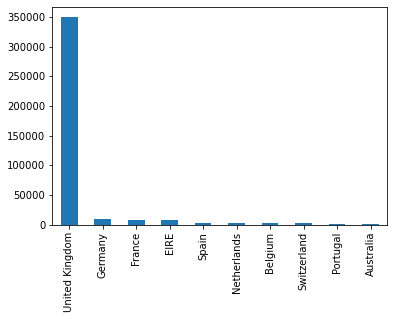

In [25]:
df['Country'].value_counts().head(10).plot(kind = 'bar')

In [29]:
import datetime as dt
import pandas as pd

last_date = dt.datetime(2011, 12, 10)

# Calculate Recency, Frequency, Monetary values
def calculate_rfm(row):
    recency = (last_date - row['InvoiceDate'].max()).days
    frequency = row['InvoiceNo'].count()
    monetary = row['total_price'].sum()
    return pd.Series({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# Group data by CustomerID and calculate RFM values
RFM_data = df.groupby("CustomerID").apply(calculate_rfm).reset_index()

# Print the resulting DataFrame
print(RFM_data.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0    325.0        1.0  77183.60
1     12347.0      2.0      182.0   4310.00
2     12348.0     75.0       31.0   1797.24
3     12349.0     18.0       73.0   1757.55
4     12350.0    310.0       17.0    334.40


In [33]:
RFM_data=RFM_data.drop(columns=["CustomerID"])

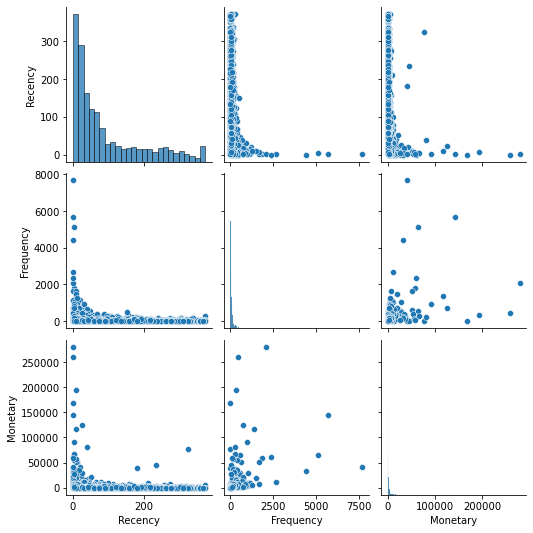

In [34]:

sns.pairplot(RFM_data)

In [36]:
sc = StandardScaler()
rfm_scl = sc.fit_transform(RFM_data)
rfm_scl

array([[ 2.32967293e+00, -3.96968210e-01,  8.36397668e+00],
       [-9.00448767e-01,  4.05730491e-01,  2.51778965e-01],
       [-1.70421263e-01, -2.63924227e-01, -2.79383250e-02],
       ...,
       [-8.50446884e-01, -3.48185416e-01, -2.08184524e-01],
       [-8.90448391e-01,  2.79608740e+00, -2.98993684e-04],
       [-5.00433697e-01, -9.09670479e-02, -2.34811224e-02]])

In [37]:
pca = PCA()
rfm_pca = pca.fit_transform(rfm_scl)

In [38]:
pca.components_

array([[-0.404648  ,  0.66430445,  0.62845811],
       [ 0.90067615,  0.17059045,  0.3996015 ],
       [ 0.1582481 ,  0.72773518, -0.66735226]])

In [39]:
pca.explained_variance_ratio_

array([0.50940414, 0.3022708 , 0.18832505])

In [40]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [42]:
inertia = {}
for n_clusters in range(1,11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(rfm_scl)
    inertia[n_clusters] = kmeans.inertia_

Text(0, 0.5, 'error')

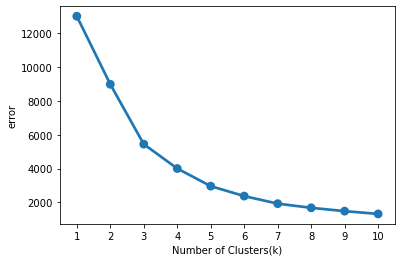

In [44]:

sns.pointplot(x = list(inertia.keys()), y = list(inertia.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('error')

In [50]:
for num in range(2,16):
    clusters = KMeans(n_clusters=num,random_state=0)
    labels = clusters.fit_predict(rfm_scl)

    sil_avg = silhouette_score(rfm_scl, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 The Silhouette Score is = 0.9312410897834


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 3 The Silhouette Score is = 0.6021340575971562


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 4 The Silhouette Score is = 0.601082246487968


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 5 The Silhouette Score is = 0.6165066123997868


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 The Silhouette Score is = 0.5901490039411342


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 The Silhouette Score is = 0.5291109974405748


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 The Silhouette Score is = 0.5143899767848613


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 The Silhouette Score is = 0.5298655180618056


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 10 The Silhouette Score is = 0.4346457864380529


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 11 The Silhouette Score is = 0.42655564442039823


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 12 The Silhouette Score is = 0.43051241767983167


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 13 The Silhouette Score is = 0.4293126926684292


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 14 The Silhouette Score is = 0.415557352655787


C:\Users\CS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 15 The Silhouette Score is = 0.41714435860884663


In [52]:
kmeans = KMeans(n_clusters=5, n_init=10)
preds = kmeans.fit_predict(rfm_scl)
RFM_data['NO_clusters'] = kmeans.labels_ +1
RFM_data

,Recency,Frequency,Monetary,NO_clusters
0,325.0,1.0,77183.60,4
1,2.0,182.0,4310.00,1
2,75.0,31.0,1797.24,1
3,18.0,73.0,1757.55,1
4,310.0,17.0,334.40,2
...,...,...,...,...
4334,277.0,10.0,180.60,2
4335,180.0,7.0,80.82,2
4336,7.0,12.0,178.05,1
4337,3.0,721.0,2045.53,4


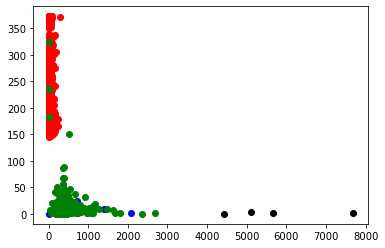

In [58]:
plt.scatter(RFM_data.iloc[preds==1,1],RFM_data.iloc[preds==1,0], color='red')
plt.scatter(RFM_data.iloc[preds==2,1],RFM_data.iloc[preds==2,0], color='blue')
plt.scatter(RFM_data.iloc[preds==3,1],RFM_data.iloc[preds==3,0], color='green')
plt.scatter(RFM_data.iloc[preds==4,1],RFM_data.iloc[preds==4,0], color='black')
plt.scatter(RFM_data.iloc[preds==5,1],RFM_data.iloc[preds==5,0], color='cyan')